# Rice Type Prediction With Random Forest Classifier

# Importing Packages

In [ ]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Machine model Algorithm module
from sklearn.ensemble import RandomForestClassifier

#Performance metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_auc_score,RocCurveDisplay,auc,roc_curve
from sklearn.metrics import precision_recall_fscore_support,log_loss,accuracy_score,f1_score

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Visualization of Tree Libraries 
from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz
#If this cell doesn't Run ignore

# Reading  Dataset
<li> Reading Dataset using pandas with command <b>pandas.read_excel("FileLocation")</b> for excel and <b>pandas.read_csv("FileLocation")</b> for csv file 

In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_excel("/content/Rice_Osmancik_Cammeo_Dataset.xlsx")
df.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
df.tail()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709991,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


##### Unique values in the column CLASS

In [ ]:
df['CLASS'].unique() #Two Rice Types 'Cammeo', 'Osmancik'

array(['Cammeo', 'Osmancik'], dtype=object)

In [ ]:
for i in range(len(df['CLASS'])):
    if(df.iloc[i,7]!='Cammeo'):
        print(df.iloc[i,7],i)
        break                          #Osmancik Rice type features Starts at 1630 in dataset

Osmancik 1630


<li> Range of Cammeo (0,1629), Range of Osmancik (1630,3810)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          3810 non-null   int64  
 1   PERIMETER     3810 non-null   float64
 2   MAJORAXIS     3810 non-null   float64
 3   MINORAXIS     3810 non-null   float64
 4   ECCENTRICITY  3810 non-null   float64
 5   CONVEX_AREA   3810 non-null   int64  
 6   EXTENT        3810 non-null   float64
 7   CLASS         3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


### Missing Values in Dataset

In [ ]:
df.isnull()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3805,False,False,False,False,False,False,False,False
3806,False,False,False,False,False,False,False,False
3807,False,False,False,False,False,False,False,False
3808,False,False,False,False,False,False,False,False


In [ ]:
True in df.isnull() #checks missing values
#Missing values are NONE

False

<li><b>Missing values are NONE</b>

In [ ]:
df.describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


# Correlation among features

In [ ]:
df.corr()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
AREA,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
PERIMETER,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
MAJORAXIS,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
MINORAXIS,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
ECCENTRICITY,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
CONVEX_AREA,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
EXTENT,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


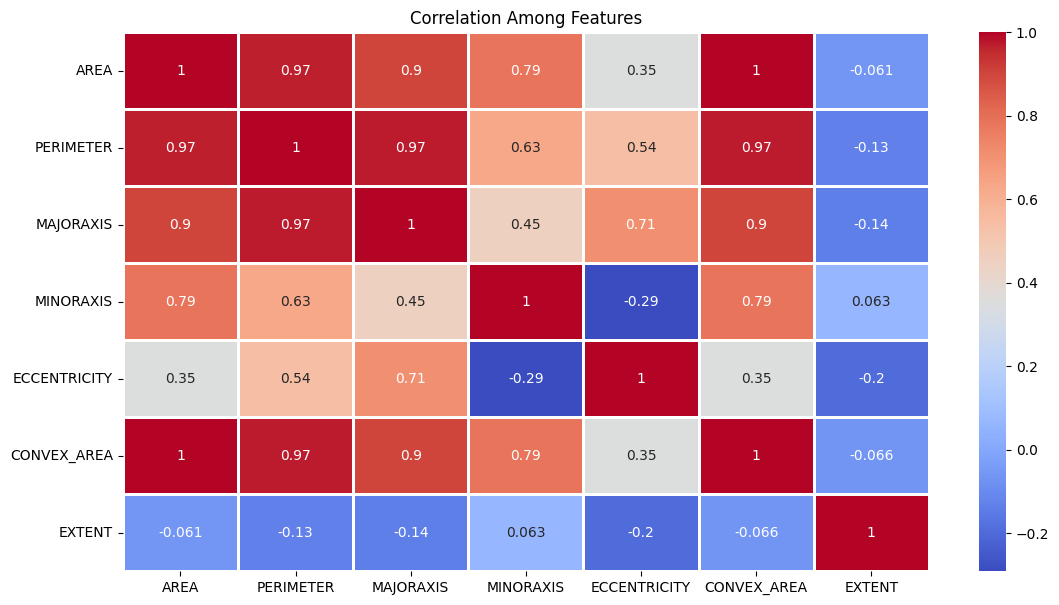

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Correlation Among Features")
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=1,annot=True)
plt.show()

<h3>Negative Correlation among:</h3><br>
<li>ECCENTRICITY VS EXTENT,MINORAXIS
<li>EXTENT VS ECCENTRICITY, MAJORAXIS, MINORAXIS, PERIMETER, AREA, CONVEX_AREA

# Data Visualization
## Comparing features of two types of Rice via Table and Graphs
### Features of Cammeo

In [ ]:
df.loc[df['CLASS']=='Cammeo'].describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,14162.892025,487.438942,205.478589,88.767532,0.901047,14494.426994,0.651420
std,1286.770521,22.181518,10.333854,5.350244,0.013381,1309.418680,0.082197
min,9908.000000,410.506012,170.781647,67.695343,0.837433,10205.000000,0.497413
25%,13289.250000,473.090248,198.580872,85.376022,0.893274,13620.250000,0.580921
50%,14212.000000,488.179504,205.716743,88.830879,0.901759,14536.500000,0.634436
75%,14997.000000,502.637756,212.433681,92.127367,0.909835,15361.000000,0.717667
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


### Features of Osmancik

In [ ]:
df.loc[df['CLASS']=='Osmancik'].describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,11549.783486,429.415505,176.287755,84.479042,0.876271,11799.585780,0.669796
std,1041.908607,20.154394,9.362405,5.302667,0.018999,1062.804346,0.072340
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.501078
25%,10850.500000,416.207993,169.989491,81.333870,0.863816,11097.000000,0.610567
50%,11552.500000,429.239502,175.665390,84.633549,0.876206,11813.500000,0.652695
75%,12269.000000,442.506744,182.099850,87.932961,0.889286,12524.000000,0.732591
max,15420.000000,503.459991,209.651169,101.762260,0.935528,15800.000000,0.832747


##  Graphs for each Feature

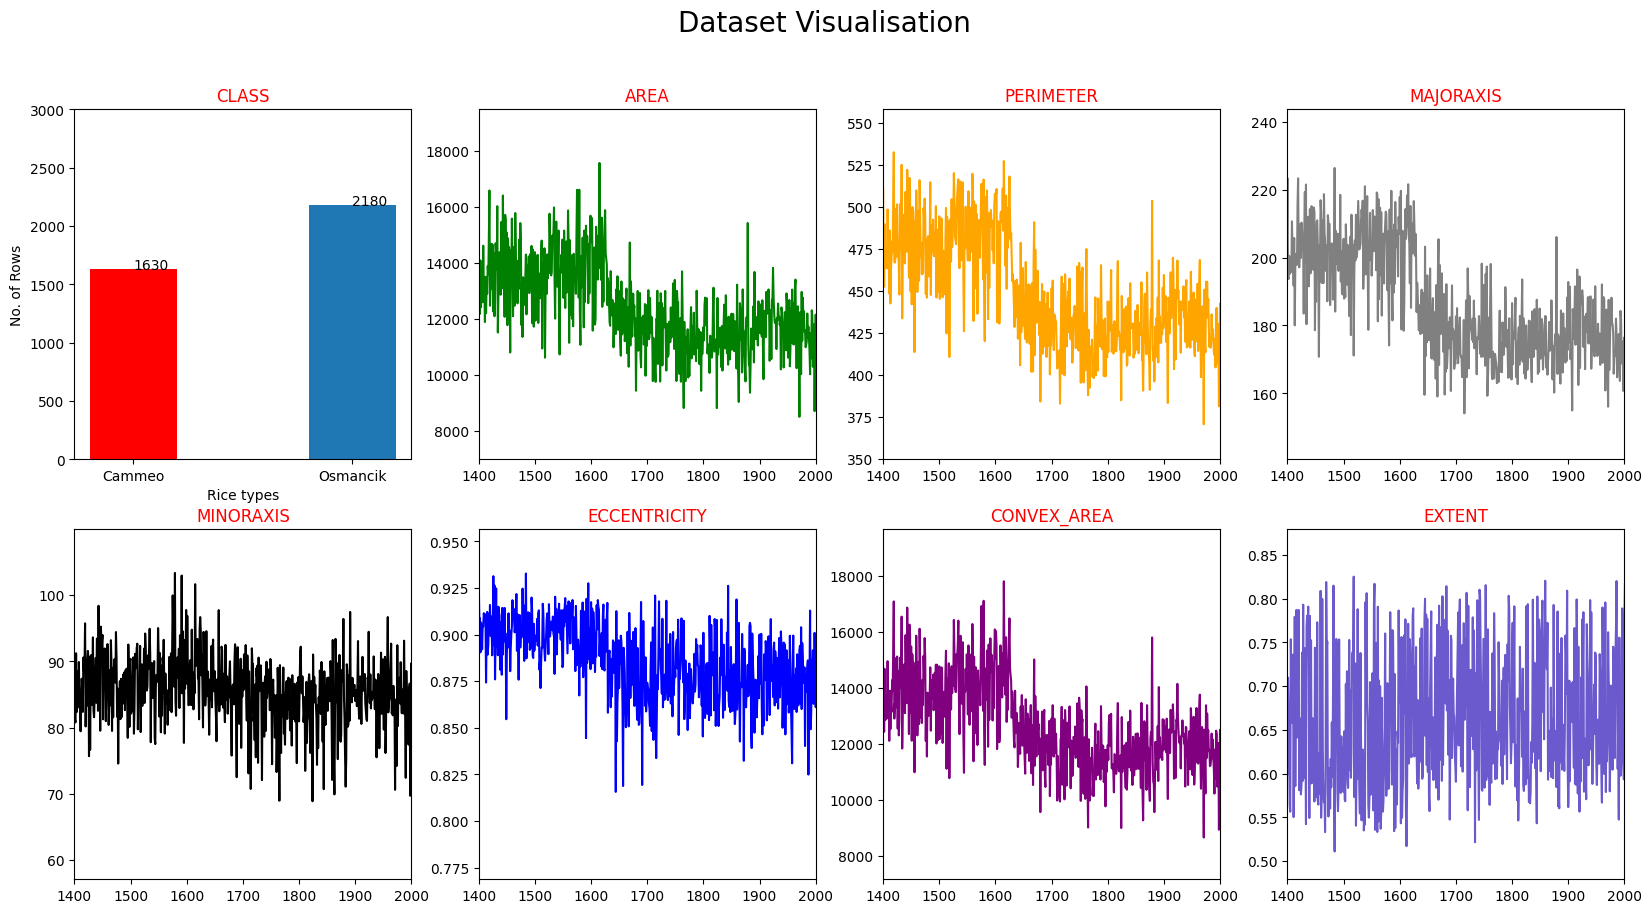

In [ ]:
barx=[len([0 for i in df['CLASS'] if(i=='Cammeo')]),len([1 for i in df['CLASS'] if(i=='Osmancik')])]
bary=['Cammeo','Osmancik']
plt.figure(figsize=(20,10))
plt.suptitle('Dataset Visualisation',size='20')
plt.subplot(2, 4, 1)
plt.title('CLASS',color='r')
plt.bar(bary,barx,0.4,color=['r','tab:blue'])
plt.xlabel('Rice types')
plt.ylabel('No. of Rows')
plt.text(0,barx[0],barx[0])
plt.text(1,barx[1],barx[1])
plt.ylim([0,3000])
plt.subplot(2, 4, 2)
plt.title('AREA',color='r')
plt.plot(df['AREA'],color='Green')
plt.xlim([1400,2000])
plt.subplot(2, 4, 3)
plt.title('PERIMETER',color='r')
plt.xlim([1400,2000])
plt.plot(df['PERIMETER'],color='Orange')
plt.subplot(2, 4, 4)
plt.title('MAJORAXIS',color='r')
plt.xlim([1400,2000])
plt.plot(df['MAJORAXIS'],color='grey')
plt.subplot(2, 4, 5)
plt.title('MINORAXIS',color='r')
plt.xlim([1400,2000])
plt.plot(df['MINORAXIS'],color='k')
plt.subplot(2, 4, 6)
plt.title('ECCENTRICITY',color='r')
plt.xlim([1400,2000])
plt.plot(df['ECCENTRICITY'],color='blue')
plt.subplot(2, 4, 7)
plt.title('CONVEX_AREA',color='r')
plt.xlim([1400,2000])
plt.plot(df['CONVEX_AREA'],color='purple')
plt.subplot(2, 4, 8)
plt.title('EXTENT',color='r')
plt.xlim([1400,2000])
plt.plot(df['EXTENT'],color='slateblue')
plt.show()

<li>Except EXTENT feature every feature has some significant difference b/w two rice types
<li> Two rice types varies in Range(min,max) values of features.

<h3>Note :  After 1630 values Cammeo ends and Osmancik values begins in dataset</h3><br>
<li>       AREA: data range(1400,2000)
 <li>  PERIMETER: data range(1400,2000)
   <li>MAJORAXIS: data range(1400,2000)
   <li>MINORAXIS: data range(1400,2000)
<li>ECCENTRICITY: data range(1400,2000)
 <li>CONVEX_AREA: data range(1400,2000)
     <li> EXTENT: data range(1400,2000)

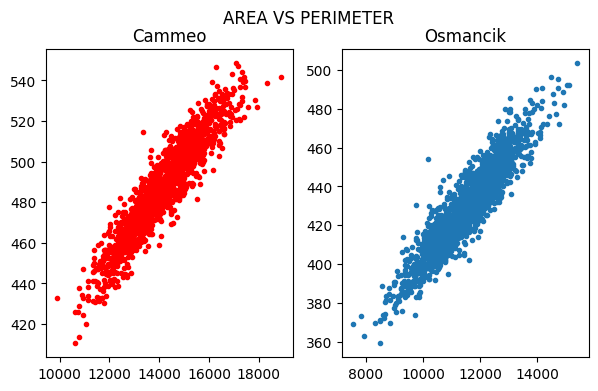

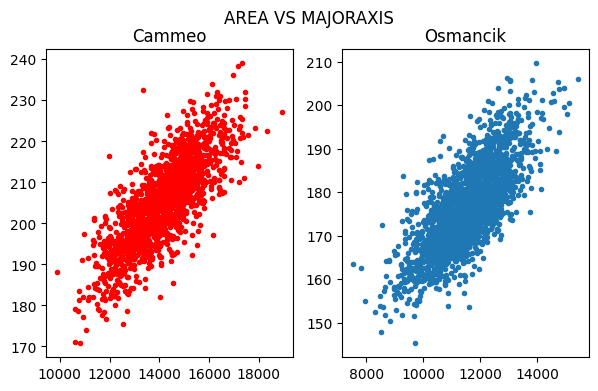

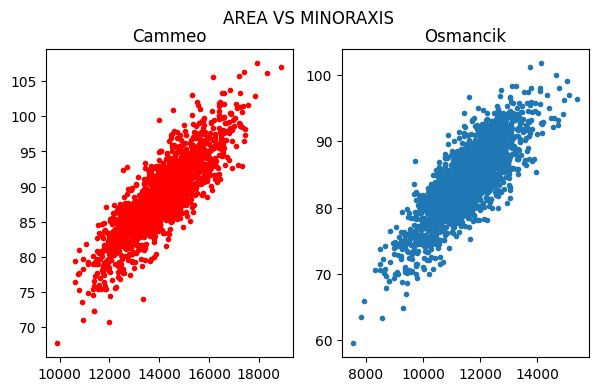

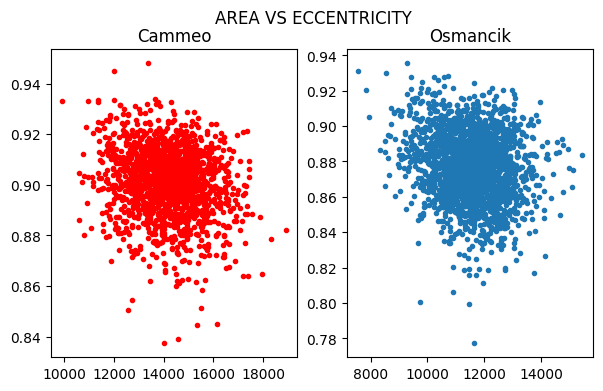

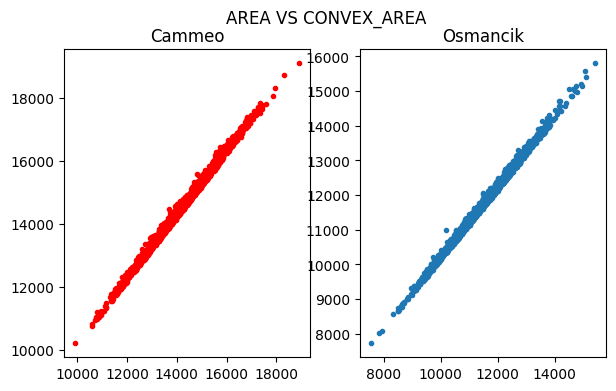

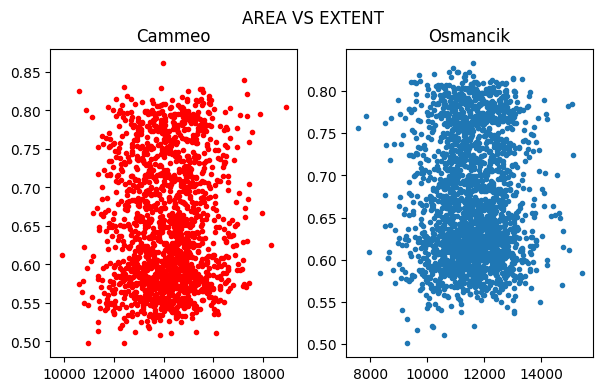

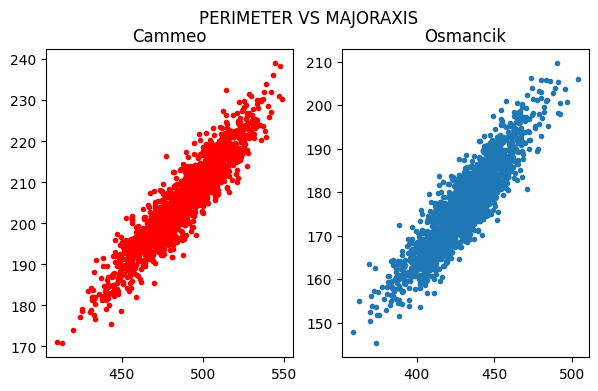

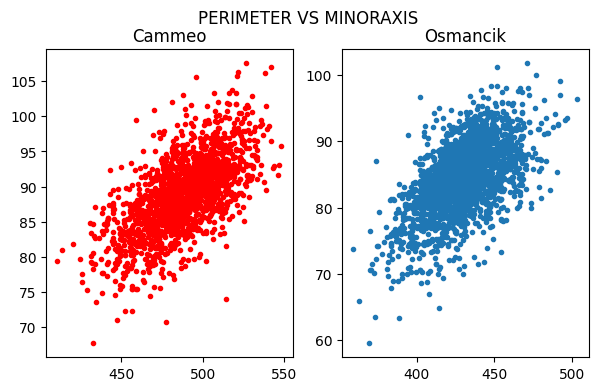

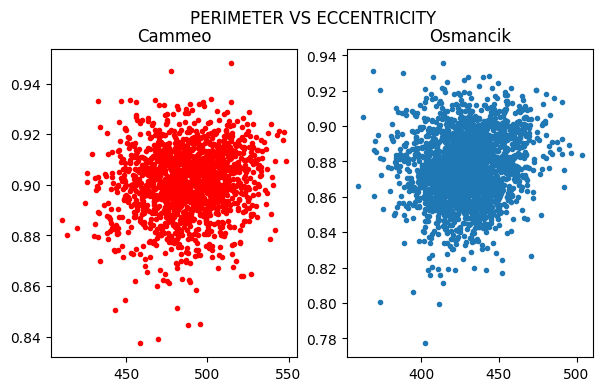

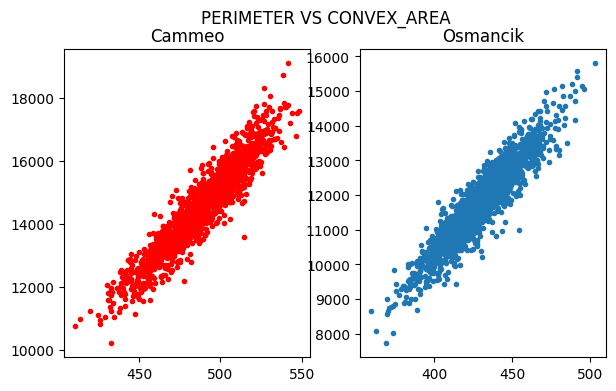

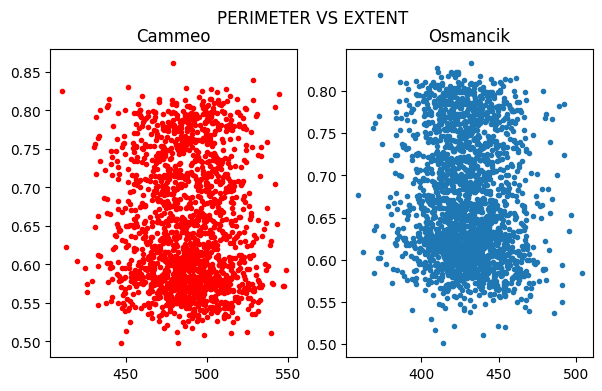

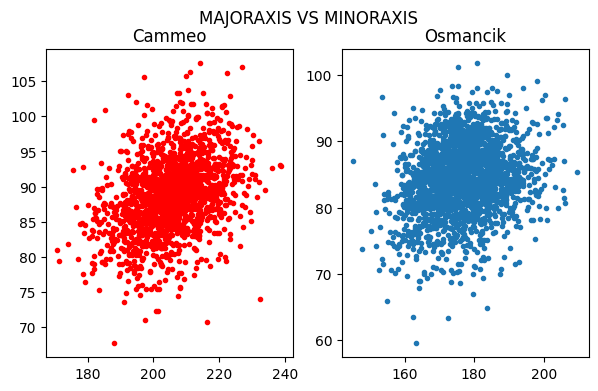

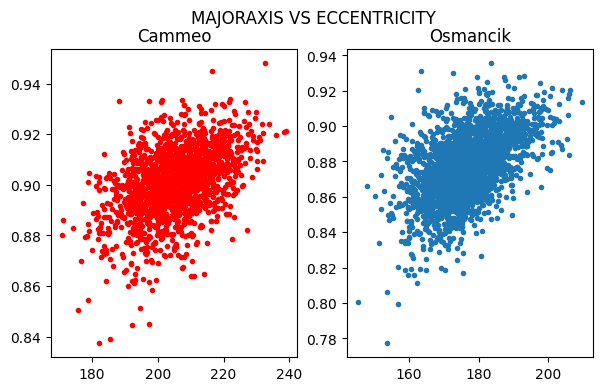

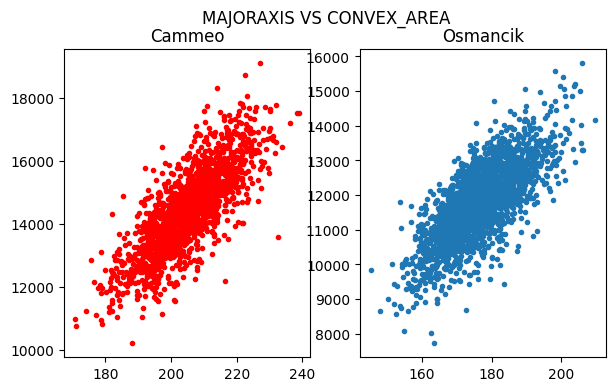

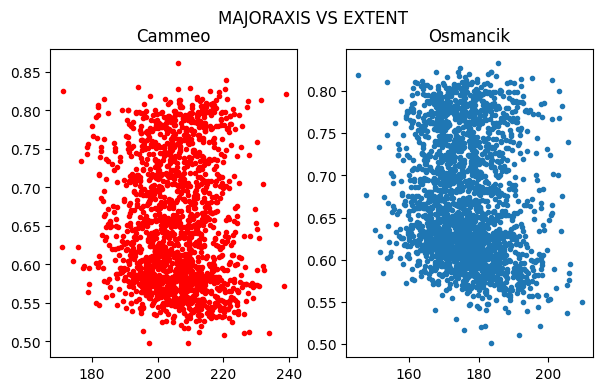

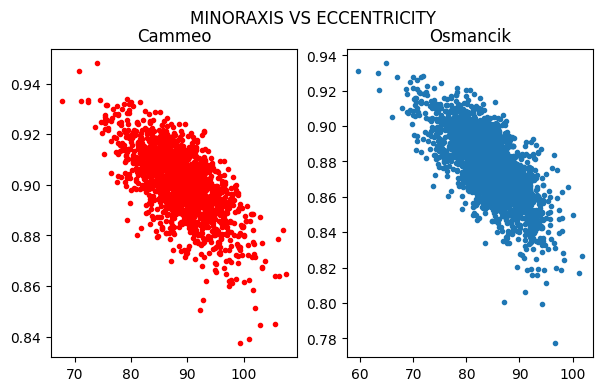

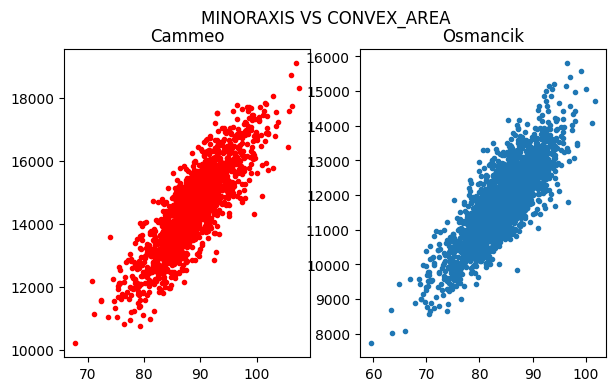

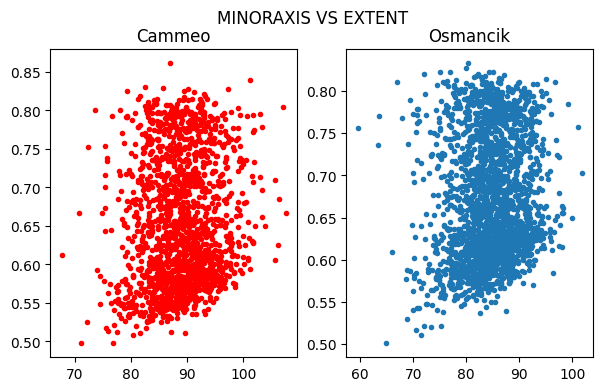

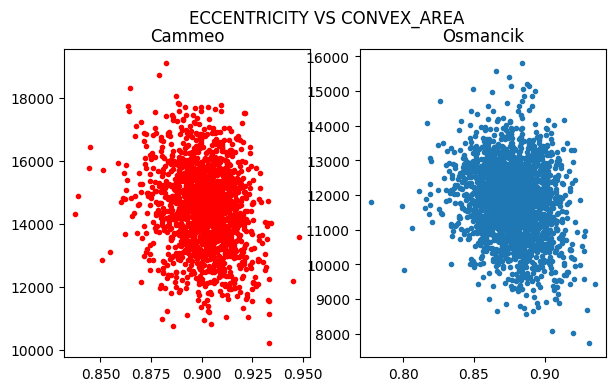

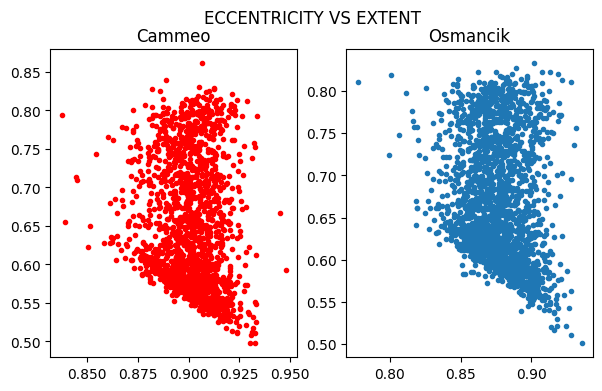

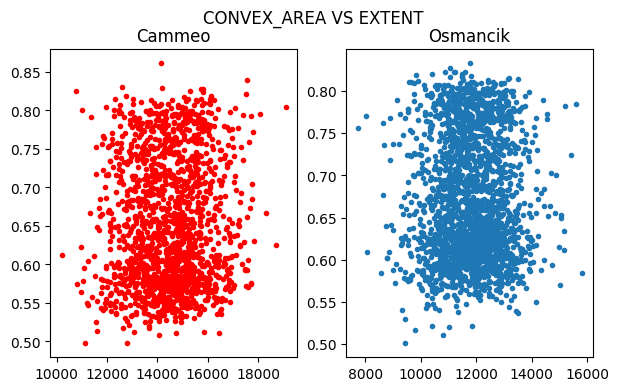

In [ ]:
for i in range(7):
    for j in range(i,7):
        if(i!=j):
            plt.figure(figsize=(7,4))
            plt.subplot(1,2,1)
            plt.suptitle(df.columns.values[i]+" VS "+df.columns.values[j])
            plt.title('Cammeo')
            plt.scatter(df.iloc[:1630,i],df.iloc[:1630,j],color='Red',marker='.')
            plt.subplot(1,2,2)
            plt.title('Osmancik')
            plt.scatter(df.iloc[1630:,i],df.iloc[1630:,j],color='tab:blue',marker='.')
    plt.show()

<li>Every feature vs feature graph is similar because of similar structure of Rice
<li>The significant difference of Range b/w two rice types helps to predict their classification with Random Forest Algorithm

# Prediction Class

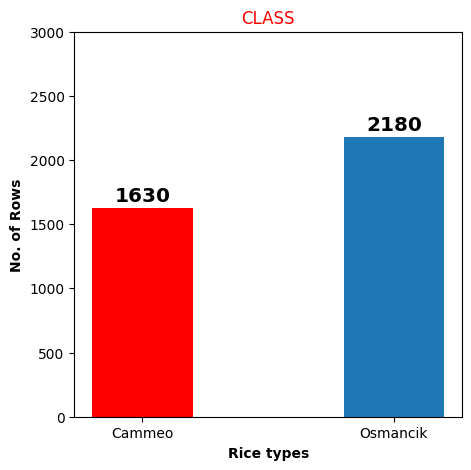

In [ ]:
plt.figure(figsize=(5,5))  #No. of rows for each type of rice
plt.bar(bary,barx,0.4,color=['r','tab:blue'])
plt.title('CLASS',color='r')
plt.xlabel('Rice types',weight='bold')
plt.ylabel('No. of Rows',weight='bold')
plt.text(0,barx[0]+50,barx[0],size='x-large',ha='center',weight='bold')
plt.text(1,barx[1]+50,barx[1],size='x-large',ha='center',weight='bold')
plt.ylim([0,3000])
plt.show()

# Data Pre Processing and Analyisis

<li>Since the we need to Predict categorical data and it is the Binary classification we can convert rice types to 0 and 1.  
<li>Cammeo=0, Osmancik=1

In [ ]:
x=df.loc[:,df.columns!='CLASS']                       #all columns except CLASS column
y=df['CLASS']                                         #CLASS cloumn
y.head()                                              #X is features of Rice, Y is Rice types to predict  

0    Cammeo
1    Cammeo
2    Cammeo
3    Cammeo
4    Cammeo
Name: CLASS, dtype: object

<li>As we can see prediction column has categorical data with object data type

<h3>Label Encoding</h3><br>
<li>Label Encoder encodes the categorical data target labels with value between 0 and n_classes-1.
<li>Since we have two unique types Label encoder replaces string values to 0 and 1 for binary computation

In [ ]:
LE = LabelEncoder()
y= LE.fit_transform(y) #Cammeo=0, Osmancik=1
y

array([0, 0, 0, ..., 1, 1, 1])

<h1> Random Forest Classifier Training and Testing</h1><br>
A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
<li>The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

<h3>Best model Function</h3><br>
<li>Best model tests with different range of hyper parameters which returns best parameters where f1 score is Higher(Higher is better)
<li>Due to the two loops in best model function it takes long time to execute code but at the end we get the Best results

In [ ]:
def bestmodel(x_train,y_train,x_test,y_test):# Gives me Best Random forest model with optimal Hyper parameters 
    def ele(v):
        return v[2] 
    f2x=[]
    for i in range(1,11):
        for j in range(10,0,-1):
            model=RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=i, min_samples_leaf=j, random_state=12)
            rf_train=model.fit(x_train,y_train)
            f2=f1_score(y_test,rf_train.predict(x_test))
            lgls=log_loss(y_test, rf_train.predict_proba(x_test))
            acc=accuracy_score(y_test, rf_train.predict(x_test))
            rac=roc_auc_score(y_test, rf_train.predict(x_test))
            f2x.append([i,j,f2,lgls,rac,acc])
    f2x.sort(key=ele,reverse=True)   #sorts according to fscore in decending order
    for i in f2x:
        if(f2x[0][2]==i[2]):
            print(i)
        else:
            break

In [ ]:
for i in np.arange(0.1,0.6,0.1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, shuffle=True,random_state=12)
    print("Test_size= ",i)
    bestmodel(x_train,y_train,x_test,y_test)
#output format= [max_depth ,min_sample_leaf, fscore, log_loss,roc_auc_score,accuracy_score]

Test_size=  0.1
[10, 10, 0.9452054794520548, 0.17767400310230153, 0.9362930547713156, 0.937007874015748]
Test_size=  0.2
[6, 10, 0.9488888888888889, 0.16801913108183938, 0.9380226862777251, 0.9396325459317585]
[8, 8, 0.9488888888888889, 0.16788625767685214, 0.9380226862777251, 0.9396325459317585]
[9, 10, 0.9488888888888889, 0.16721681027299748, 0.9380226862777251, 0.9396325459317585]
Test_size=  0.30000000000000004
[7, 10, 0.9461254612546125, 0.1785540349457913, 0.932442998385795, 0.9361888111888111]
Test_size=  0.4
[10, 8, 0.9414389291689906, 0.20644397764864786, 0.9276273349165279, 0.9311023622047244]
Test_size=  0.5
[5, 4, 0.9392314566577302, 0.18750713778842165, 0.9247171251398523, 0.9286089238845144]


<h3>Random Forest Best model Results</h3><br>
<table style="font-size:14px;text-align:center">
<tr >
    <th style='border: 1px solid black'>Random_state</th>
    <th style='border: 1px solid black'>Test_size</th>  
    <th style='border: 1px solid black'>max_depth</th>
    <th style='border: 1px solid black'>min_samples_leaf</th>
    <th style='border: 1px solid black'>F1score</th> 
    <th style='border: 1px solid black'>Log_loss</th>
    <th style='border: 1px solid black'>Roc_Auc_score</th> 
    <th style='border: 1px solid black'>Accuracy</th> 
</tr>
<tr>
   <td style='border: 1px solid black'>12</td>
   <td style='border: 1px solid black'>0.2</td>
    <td style='border: 1px solid black'>6</td>
    <td style='border: 1px solid black'>10</td>
    <td style='border: 1px solid black'>0.9488888888888889</td>
    <td style='border: 1px solid black'>0.16801913108183938</td>
    <td style='border: 1px solid black'>0.9380226862777251</td>
    <td style='border: 1px solid black'><b>93.96%</b></td>
</tr>
</table>
</center>

<strong><li>Spliting dataset according test size we got from best model</strong>

## Random Forest Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True,random_state=12)

In [ ]:
model=RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=6, min_samples_leaf=10, random_state=12)
rf_train=model.fit(x_train,y_train)
rf_train

RandomForestClassifier(max_depth=6, min_samples_leaf=10, random_state=12)

# Performance Metrics

<Strong>Possible Performance metrics for classification problem are</Strong><br>
<li>Confusion Matrix
<li>F1score (balances the precision and recall)
<li>Log loss
<li>Accuracy score
<li>ROC curve
<li>ROC-AUC score(Area Under Curve in ROC Graph)


<h3>Confusion Matrix</h3><br>
<li>A confusion matrix is a technique for summarizing the performance of a classification algorithm
<li>It is a table with 4 different combinations of predicted and actual values.
<img src="https://miro.medium.com/max/875/1*hbFaAWGBfFzlPys1TeSJuQ.png">

In [ ]:
confusion_matrix(y_test,rf_train.predict(x_test))

array([[289,  22],
       [ 24, 427]])

<h3>Precision, Recall, and F-1 Score</h3><br>
<ul>
<li>Precision is the fraction of the correctly classified instances from the total classified instances. 
 <li>Recall is the fraction of the correctly classified instances from the total classified instances. 
<li>Precision and recall are given as follows
</ul>
<img src="https://miro.medium.com/max/528/1*QgpsBe5F3oxTqRrdpAEqCA.png"><img src="https://miro.medium.com/max/538/1*0u2TPwlxNX3WGX9GIv9LWA.png"><br>
<li>The F1 score can be interpreted as a weighted average of the precision and recall.
<li><b> F1 score reaches its best value at 1 and worst score at 0.</b><br>
<img src="https://miro.medium.com/max/769/1*PM5OdN3pZbSN1jQbnwMBBw.png">

In [ ]:
f1_score(y_test,rf_train.predict(x_test)) #F1_score balances the percision and recall from confusion matrix

0.9488888888888889

In [ ]:
precision_recall_fscore_support(y_test,rf_train.predict(x_test),average ='binary')
#output Format(precision, recall, fscore, support)

(0.9510022271714922, 0.9467849223946785, 0.9488888888888889, None)

<h3>Log loss</h3><br>
<li>Logarithmic loss (or log loss) measures the performance of a classification model where the prediction is a probability value between 0 and 1.
<li>Log loss increases as the predicted probability diverge from the actual label.
    <br><br><center><b>Lower the log-loss value, better are the predictions of the model.</b></center>
<img src= "https://miro.medium.com/max/875/1*EWS2pNHzjBYeuK3K8Jkf0w.png">

In [ ]:
log_loss(y_test, rf_train.predict_proba(x_test))

0.16801913108183938

<h3>Accuracy Score</h3><br>
<li>In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
<li><b>It ranges from 0 to 1, where 0 is Worst and 1 is Best</b>
 <li>Its is often multipled with 100 to get accuracy percentage.


In [ ]:
accuracy_score(y_test, rf_train.predict(x_test))*100 #Accuracy of prediction in %

93.96325459317585

<h3>ROC AUC score</h3><br>
<li>Tt is used to find Area Under Curve(AUC) in ROC graph.
<li><b>It ranges from 0 to 1, where 0 is Worst and 1 is Best</b>

In [ ]:
roc_auc_score(y_test, rf_train.predict(x_test))

0.9380226862777251

<h1>Results</h1><br>
<table style="font-size:14px;text-align:center;height:2px;">
<tr >
    <th style='border: 1px solid black'>Random_state</th>
    <th style='border: 1px solid black'>Test_size</th>  
    <th style='border: 1px solid black'>max_depth</th>
    <th style='border: 1px solid black'>min_samples_leaf</th>
    <th style='border: 1px solid black'>Confusion matrix</th>
    <th style='border: 1px solid black'>F1score</th> 
    <th style='border: 1px solid black'>Log_loss</th>
    <th style='border: 1px solid black'>Roc_Auc_score</th> 
    <th style='border: 1px solid black'>Accuracy</th> 
</tr>
<tr>
   <td style='border: 1px solid black'>12</td>
   <td style='border: 1px solid black'>0.2</td>
    <td style='border: 1px solid black'>6</td>
    <td style='border: 1px solid black'>10</td>
    <td style='border: 1px solid black'><table style="font-size:15px;border:1px solid black">
        <tr>
            <td style='border: 1px solid black'>289</td>
            <td style='border: 1px solid black'>22</td> 
        </tr>
        <tr>
            <td style='border: 1px solid black'>24</td>
            <td style='border: 1px solid black'>427</td> 
        </tr>
        </table></td>
    <td style='border: 1px solid black'>0.9488</td>
    <td style='border: 1px solid black'>0.16801</td>
    <td style='border: 1px solid black'>0.94</td>
    <td style='border: 1px solid black'><b>93.96%</b></td>
</tr>
</table>
</center>

# Observations
### Plotting  no. of decision trees vs LogLoss

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without featu

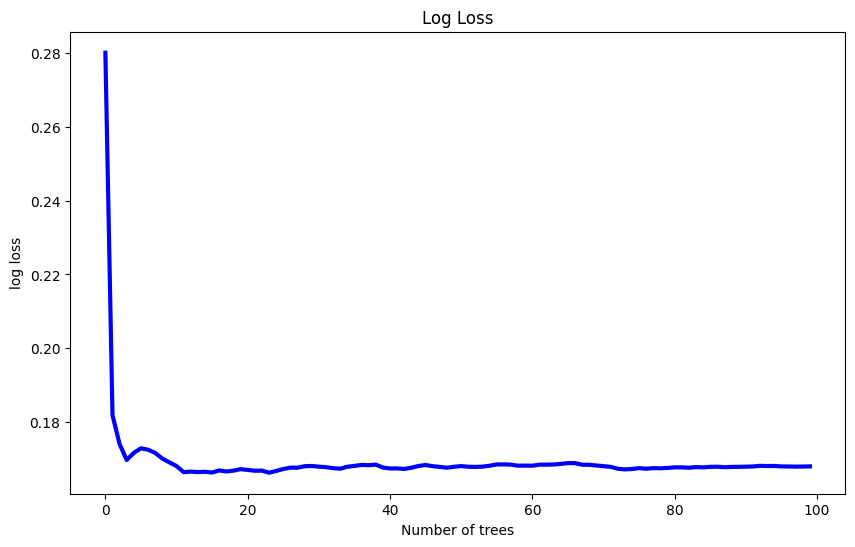

In [ ]:
preds = np.stack([t.predict_proba(x_test) for t in rf_train.estimators_])
lgls=[log_loss(y_test,np.mean(preds[:i+1], axis=0)) for i in range(100)]
plt.figure(figsize=(10,6))
plt.plot(lgls,color='b',linewidth=3)
plt.xlabel('Number of trees')
plt.ylabel('log loss')
plt.title('Log Loss')
plt.show()

<li>Number Decision trees increases in model,log-loss decreases

### Plotting ROC curve for True Positives VS False Positives

<li>ROC=Compute Receiver Operating Characteristic.

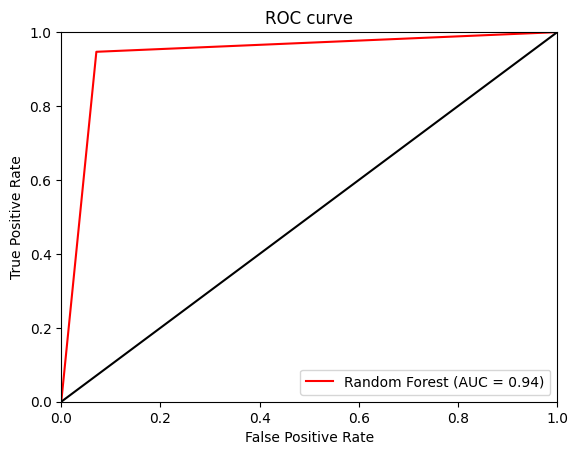

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_train.predict(x_test))
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Random Forest')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Sample Decision tree in Random forest model

<li>Visualizing first Decision tree in Random Forest ensemble model

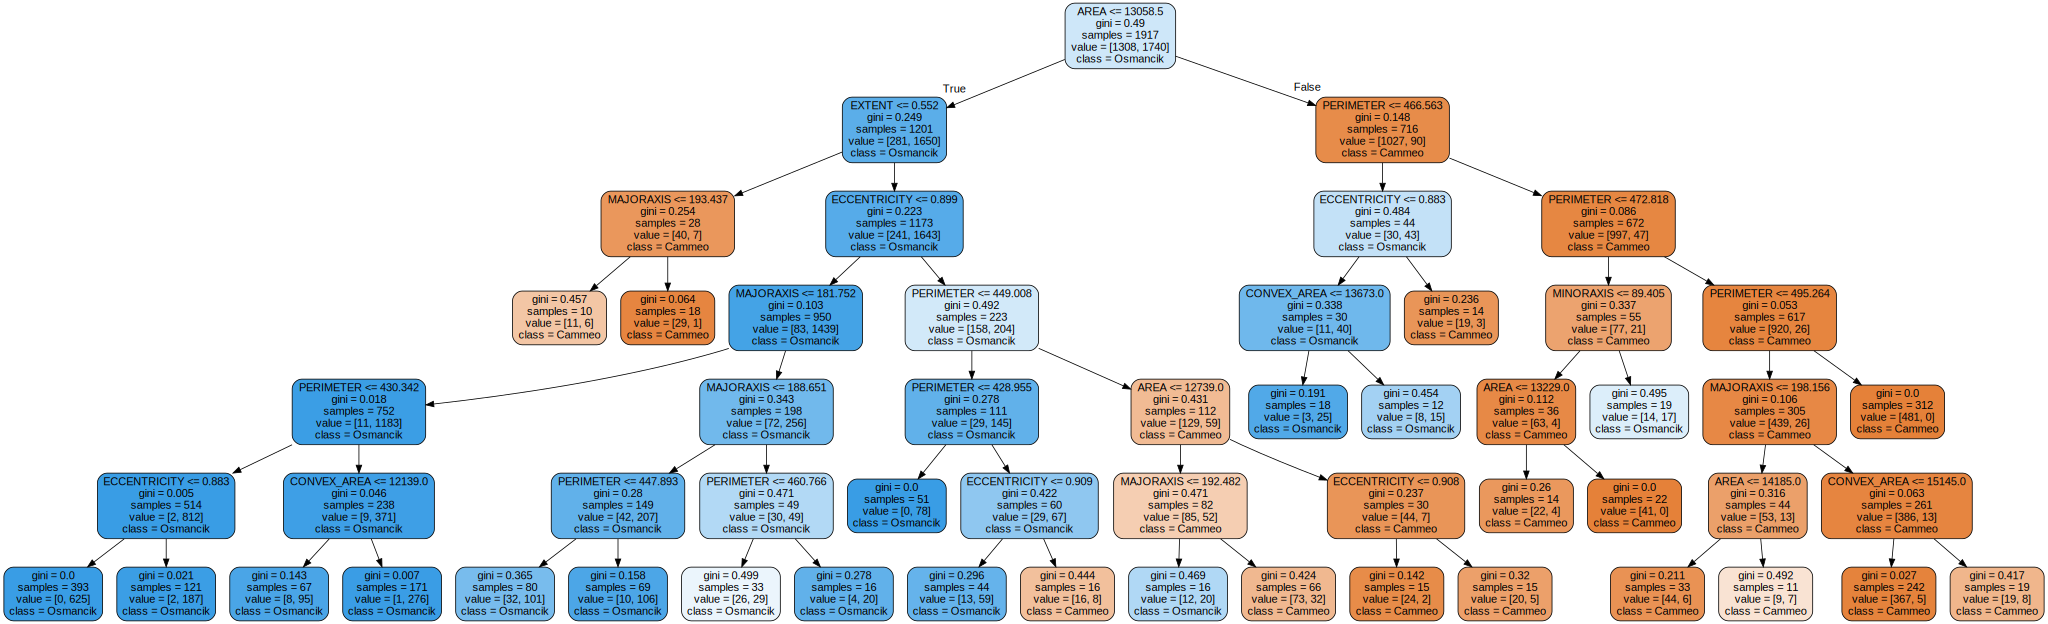

In [ ]:
#visualise in one of the decision tree in random forest with best Hyper parameters
dot_data = export_graphviz(rf_train.estimators_[0], 
                           feature_names=x.columns.values,
                           class_names=['Cammeo','Osmancik'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render('figure_name')
graph

# End of the Notebook